# Data Munging ReEDS output data files for input installations

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. This input data will be used in the module files input to the PVDEMICE tool. Some will be used to explore middle, low and high projections, some for the Solar Futures Report. This journal extracts the data relevant for the current status of the PVDEMICE tool from ReEDS outputs.

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

reedsFile = str(Path().resolve().parent.parent.parent / 'December Core Scenarios ReEDS Outputs Solar Futures.xlsx')
testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

print ("Input file is stored in %s" % reedsFile)
print ("Your simulation will be stored in %s" % testfolder)


Input file is stored in C:\Users\sayala\Documents\GitHub\December Core Scenarios ReEDS Outputs Solar Futures.xlsx
Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [3]:
cwd = os.getcwd() #grabs current working directory
rawdf = pd.read_excel(reedsFile,
                        sheet_name="Solar Capacity (GW)")
                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels
#now set year as an index in place
rawdf.drop(columns=['State'], inplace=True)
rawdf.set_index(['scenario','year','PCA'], inplace=True)


In [4]:
rawdf.index.get_level_values('scenario').unique()

Index(['Reference.Mod', 'Reference.Adv', 'Reference.Adv+DR', '95-by-35.Mod',
       '95-by-35.Adv', '95-by-35.Adv+DR', '95-by-35+Elec.Mod',
       '95-by-35+Elec.Adv', '95-by-35+Elec.Adv+DR'],
      dtype='object', name='scenario')

In [5]:
scenarios = list(rawdf.index.get_level_values('scenario').unique())
PCAs = list(rawdf.index.get_level_values('PCA').unique())
scenarios

['Reference.Mod',
 'Reference.Adv',
 'Reference.Adv+DR',
 '95-by-35.Mod',
 '95-by-35.Adv',
 '95-by-35.Adv+DR',
 '95-by-35+Elec.Mod',
 '95-by-35+Elec.Adv',
 '95-by-35+Elec.Adv+DR']

In [6]:
import PV_ICE
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='US', file=r'..\baselines\baseline_modules_US.csv')
baseline = r1.scenario['US'].data
baseline = baseline.drop(columns=['new_Installed_Capacity_[MW]'])
baseline.set_index('year', inplace=True)
baseline.index = pd.PeriodIndex(baseline.index, freq='A')  # A -- Annual


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [75]:
baseline

,mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,mod_Repowering,mod_Repairing
year,,,,,,,,,,
1995,12.500000,15.0,20.0,0.55,10.0,95.0,15.0,40.0,0.0,0.0
1996,12.700000,15.0,20.0,0.55,10.0,95.0,15.0,40.0,0.0,0.0
1997,12.880000,16.0,21.0,0.55,15.0,95.0,15.0,40.0,0.0,0.0
1998,13.060000,16.0,21.0,0.55,15.0,95.0,15.0,40.0,0.0,0.0
1999,13.240000,17.0,22.0,0.55,15.0,95.0,15.0,40.0,0.0,0.0
2000,13.420000,17.0,22.0,0.60,25.0,95.0,15.0,40.0,0.0,0.0
2001,13.600000,18.0,23.0,0.60,25.0,95.0,15.0,40.0,0.0,0.0
2002,13.722222,18.0,23.0,0.60,25.0,95.0,15.0,40.0,0.0,0.0
2003,13.844444,18.0,23.0,0.60,25.0,96.0,15.0,40.0,0.0,0.0


In [56]:
for ii in range (len(rawdf.unstack(level=1))):
    PCA = rawdf.unstack(level=1).iloc[ii].name[1]
    SCEN = rawdf.unstack(level=1).iloc[ii].name[0]
    SCEN=SCEN.replace('+', '_')
    filetitle = SCEN+'_'+PCA +'.csv'
    filetitle = os.path.join(testfolder, filetitle)
    A = rawdf.unstack(level=1).iloc[ii]
    A = A.droplevel(level=0)
    A.name = 'new_Installed_Capacity_[MW]'
    A = pd.DataFrame(A)
    A.index=pd.PeriodIndex(A.index, freq='A')
    A = A.resample('Y').asfreq()
    A = A['new_Installed_Capacity_[MW]'].fillna(0).groupby(A['new_Installed_Capacity_[MW]'].notna().cumsum()).transform('mean')    
    A = pd.DataFrame(A)
    A['new_Installed_Capacity_[MW]'] = A['new_Installed_Capacity_[MW]'] * 1000
    # Add other columns
    A = pd.concat([A, baseline.reindex(A.index)], axis=1)

    header = "year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,"\
    "mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,"\
    "mod_Repowering,mod_Repairing\n"\
    "year,MW,%,years,years,%,years,%,%,%,%,%\n"

    with open(filetitle, 'w', newline='') as ict:
    # Write the header lines, including the index variable for
    # the last one if you're letting Pandas produce that for you.
    # (see above).
        for line in header:
            ict.write(line)

        #    savedata.to_csv(ict, index=False)
        A.to_csv(ict, header=False)

In [57]:
# EXAMPLE FOR JUST ONE 
ii = 0
PCA = rawdf.unstack(level=1).iloc[ii].name[1]
SCEN = rawdf.unstack(level=1).iloc[ii].name[0]
SCEN=SCEN.replace('+', '_')
filetitle = SCEN+'_'+PCA +'.csv'
filetitle = os.path.join(testfolder, filetitle)
A = rawdf.unstack(level=1).iloc[ii]        
A = A.droplevel(level=0)
A.name = 'new_Installed_Capacity_[MW]'
A = pd.DataFrame(A)
A['new_Installed_Capacity_[MW]'] = A['new_Installed_Capacity_[MW]'] * 1000
A.index=pd.PeriodIndex(A.index, freq='A')
B = A.resample('Y').asfreq()
B = B['new_Installed_Capacity_[MW]'].fillna(0).groupby(B['new_Installed_Capacity_[MW]'].notna().cumsum()).transform('mean')
B = pd.DataFrame(B)
B.to_csv(filetitle)

# Add other columns
B = pd.concat([B, baseline.reindex(B.index)], axis=1)


header = "year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,"\
"mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,"\
"mod_Repowering,mod_Repairing\n"\
"year,MW,%,years,years,%,years,%,%,%,%,%\n"

with open(filetitle, 'w', newline='') as ict:
# Write the header lines, including the index variable for
# the last one if you're letting Pandas produce that for you.
# (see above).
    for line in header:
        ict.write(line)

    #    savedata.to_csv(ict, index=False)
    B.to_csv(ict, header=False)


In [40]:
## Reading inputs adn creating scenarios

In [7]:
GISfile = str(Path().resolve().parent.parent.parent / 'gis_centroid_n.xlsx')
GIS = pd.read_excel(GISfile)
GIS = GIS.set_index('id')

In [8]:
GIS.head()

,long,lat,country
id,,,
p1,-121.452252,47.820991,USA
p10,-117.159039,35.120104,USA
p100,-78.257714,38.791108,USA
p101,-82.192477,28.708695,USA
p102,-80.563731,26.677092,USA


In [9]:
GIS.loc['p1'].long

-121.4522522

In [10]:
simulationname = scenarios
simulationname = [w.replace('+', '_') for w in simulationname]
PCA = PCAs[0]
simulationname


['Reference.Mod',
 'Reference.Adv',
 'Reference.Adv_DR',
 '95-by-35.Mod',
 '95-by-35.Adv',
 '95-by-35.Adv_DR',
 '95-by-35_Elec.Mod',
 '95-by-35_Elec.Adv',
 '95-by-35_Elec.Adv_DR']

In [13]:
for ii in range (0, 1): #len(scenarios):
    r1 = PV_ICE.Simulation(name=scenarios[ii], path=testfolder)
    for jj in range (0, 10): #len(PCAs)): 
        filetitle = scenarios[ii]+'_'+PCAs[jj]+'.csv'
        filetitle = os.path.join(testfolder, filetitle)        
        r1.createScenario(name=PCAs[jj], file=filetitle)
        r1.scenario[PCAs[jj]].addMaterial('glass', file=r'..\baselines\baseline_material_glass_Reeds.csv')
        r1.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
        r1.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [14]:
r1.scenario['p1'].data

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,mod_Repowering,mod_Repairing
0,2010,0.007727,14.700000,22.0,27.0,0.3,25.0,97.0,15.0,40.0,0.0,0.0
1,2011,0.007727,15.100000,22.0,27.0,0.3,25.0,97.0,15.0,40.0,0.0,0.0
2,2012,4.696818,15.400000,22.0,27.0,0.3,25.0,97.0,15.0,40.0,0.0,0.0
3,2013,4.696818,16.000000,25.0,30.0,0.3,25.0,97.0,15.0,40.0,0.0,0.0
4,2014,11.184091,16.300000,25.0,30.0,0.3,25.0,97.0,15.0,40.0,0.0,0.0
5,2015,11.184091,17.000000,25.0,30.0,0.3,25.0,97.0,15.0,40.0,0.0,0.0
6,2016,27.591364,17.500000,25.0,30.0,0.3,25.0,97.0,15.0,40.0,0.0,0.0
7,2017,27.591364,17.700000,25.0,30.0,0.3,25.0,97.0,15.0,40.0,0.0,0.0
8,2018,45.195000,18.400000,25.0,30.0,0.3,25.0,97.0,15.0,40.0,0.0,0.0
9,2019,45.195000,19.200000,25.0,30.0,0.3,25.0,97.0,15.0,40.0,0.0,0.0


In [15]:
r1.calculateMassFlow()

Working on Scenario:  p1
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p10
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p101
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p102
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p103
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p104
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p105
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Wor

In [16]:
r1.scenario['p107'].data['Cumulative_Area_disposedby_Failure'].sum()

2503696.988662489

In [17]:
r1.scenario['p105'].data['Cumulative_Area_disposedby_Failure'].sum()

3509299.481961859

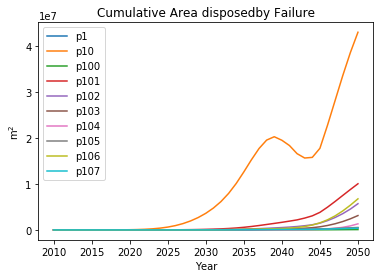

In [18]:
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')

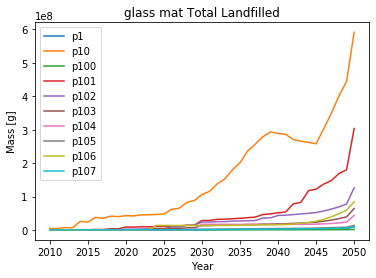

In [19]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')

## Playing with Multiindex Stuff

In [ ]:
rawdf.unstack(level=0).head()
rawdf.unstack(level=1).head()
rawdf.unstack(level=2).head()


In [ ]:
rawdf.unstack(level=1).iloc[0]


In [ ]:
rawdf.unstack(level=1).iloc[2].name[1]

In [ ]:
rawdf.loc[('Reference.Mod',2010)].head()

In [ ]:
scenarios = rawdf.groupby(level=0)
PCA = rawdf.groupby(level=2)

In [ ]:
for a,b in scenarios:
    for c,d in PCA:
        print(a, c)

In [ ]:
PCAs = rawdf.index.get_level_values('PCA').unique()
scenarios = rawdf.index.get_level_values('scenario').unique()
years = rawdf.index.get_level_values('year').unique()

In [ ]:
rawdf.loc[(scenarios[1])].head()

In [ ]:
rawdf.loc[scenarios[1]].head()

In [ ]:
rawdf.loc[[scenarios[1]]].head()